# SCALE AIML Tutorial 3

In [1]:
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import metrics

C:\Users\Sanjay Saha\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sanjay Saha\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\.libs\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll
C:\Users\Sanjay Saha\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)


# Q1. 
`Use the fetch_openml function found in sklearn.datasets to load the mnist_784 dataset into python. This will load X and y variables for you.`
- Print the dimensions of the variables returned by the function.
- Write a python script to find how many distinct values are present in y?
- Select one sample from X for each distinct y value.
- Resize each sample to represent the 28x28 pixel image.
- Display all the selected images in one diagram using subplots in matplotlib.

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# Print the dimensions of the variables returned by the function.

print(f'X shape = {X.shape}, y shape = {y.shape}')

X shape = (70000, 784), y shape = (70000,)


In [3]:
# Write a python script to find how many distinct values are present in y?

distinct_y = np.unique(y)
print(distinct_y)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [4]:
# Select one sample from X for each distinct y value.

distinct_idx = []
for d_y in distinct_y:
    distinct_idx.append(np.where(y==d_y)[0][0])

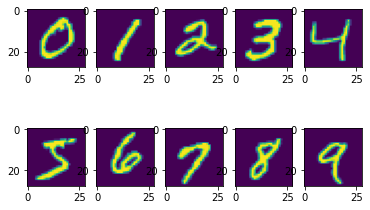

In [5]:
# Resize each sample to represent the 28x28 pixel image.
# Display all the selected images in one diagram using subplots in matplotlib.

fig = plt.figure()
for i, u in enumerate(distinct_idx):  # 'u' for distinct index
    image = X[u].reshape((28, 28))
    
    fig.add_subplot(2, 5, i+1)
    plt.imshow(image)
plt.show()    

# Q2
`Use sklearn to train a digit classifier.`
- Split the X and y into a training set and testing set of 80-20 split.
- Train a Support Vector Machin (SVM) for classification of the digits using the training set.
- Test the model using the test set.
- Experiment with different parameter values for the SVM and see how it performs. Try changing the gamma value to be [0.0001, 0.0005, 0.001, 0.005, 0.01]
- Plot the accuracy value with respect to the change in gamma above.

In [6]:
# Split the X and y into a training set and testing set of 80-20 split.

train_samples = int(X.shape[0] * 0.8)
test_samples = X.shape[0] - train_samples

train_samples = train_samples // 100
test_samples = test_samples // 100

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=test_samples)

print(f'X train shape = {X_train.shape}, X test shape = {X_test.shape}')

X train shape = (560, 784), X test shape = (140, 784)


In [7]:
# Train a Support Vector Machin (SVM) for classification of the digits using the training set.

from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train, y_train)

# Test the model using the test set.

y_pred = clf_svc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'SVC Accuracy: {accuracy}')

SVC Accuracy: 0.9142857142857143


In [8]:
gamma_values = [0.0001, 0.0005, 0.001, 0.005, 0.01]
accuracy_list_svc_g = []
for g in gamma_values:
    
    clf = SVC(kernel="poly", gamma=g)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_list_svc_g.append(accuracy)
    print(f'g={g}, acc={accuracy}')
    
print('========================')

kernels = ['rbf', 'poly', 'linear', 'sigmoid']
accuracy_list_svc_k = []
for k in kernels:
    
    clf = SVC(kernel=k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_list_svc_k.append(accuracy)
    print(f'kernel={k}, acc={accuracy}')

g=0.0001, acc=0.85
g=0.0005, acc=0.85
g=0.001, acc=0.85
g=0.005, acc=0.85
g=0.01, acc=0.85
kernel=rbf, acc=0.9142857142857143
kernel=poly, acc=0.8071428571428572
kernel=linear, acc=0.9
kernel=sigmoid, acc=0.8142857142857143


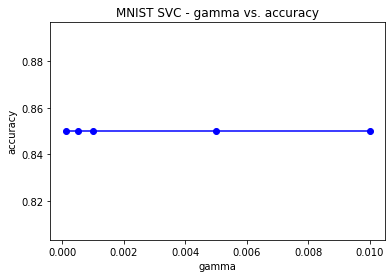

In [9]:
plt.clf()
plt.plot(gamma_values, accuracy_list_svc_g, "-ob")
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('MNIST SVC - gamma vs. accuracy')
plt.show()

In [ ]:
plt.clf()
plt.bar(kernels, accuracy_list_svc_k, color="darkred")
plt.xlabel('kernel')
plt.ylabel('accuracy')
plt.title('MNIST SVC - kernel vs. accuracy')
plt.show()